In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('results/occupation/raw_results.csv', index_col = [0])

data_f2 = data[['region_name', 'decade', 'y_mean', 'y_min', 'y_max', 'occupation']].copy()
data_f2 = data_f2.groupby(['region_name', 'decade', 'occupation'])[['y_mean', 'y_min', 'y_max']].mean().reset_index()
data_f2 = data_f2.groupby(['region_name', 'decade'])[['y_mean', 'y_min', 'y_max']].sum().reset_index()
data_f2

,region_name,decade,y_mean,y_min,y_max
0,Arabic world,500,0.041329,0.029513,0.054083
1,Arabic world,540,0.114179,0.088220,0.141563
2,Arabic world,560,0.107955,0.083772,0.133225
3,Arabic world,580,0.134640,0.103269,0.167359
4,Arabic world,600,0.184322,0.142557,0.228980
...,...,...,...,...,...
1733,United Kingdom,1840,0.661010,0.611492,0.711873
1734,United Kingdom,1850,0.661788,0.612418,0.712499
1735,United Kingdom,1860,0.662218,0.612779,0.713361
1736,United Kingdom,1870,0.662264,0.611610,0.714360


In [25]:
data

,Unnamed: 0,individual_wikidata_id,decade,region_name,count_works,occupation,century,count,y,y_mean,y_min,y_max,f0,max_f0,min_f0,f1,f2
0,0,Q1000034,1850,German world,0.0,Scientist,1800,0.0,0,0.032204,0.030418,0.034024,14.542212,15.452749,13.712405,1,0
1,5,Q100022441,1770,France,0.0,Theater-related Artist,1800,0.0,0,0.041742,0.036861,0.046653,10.999270,12.582940,9.740781,1,0
2,9,Q100028706,1880,Italy,0.0,Musician,1900,0.0,0,0.004316,0.003703,0.004955,114.851656,134.019412,99.916857,1,0
3,13,Q100029799,1860,Italy,0.0,Musician,1900,0.0,0,0.004318,0.003705,0.004955,114.796390,133.955364,99.915729,1,0
4,16,Q100031,1670,German world,0.0,Poet,1700,0.0,0,0.028093,0.025853,0.030345,16.812248,18.353155,15.492224,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108903,474171,Q99980563,1790,Spain,0.0,Sculptor,1800,0.0,0,0.076395,0.069378,0.083637,5.583106,6.241561,5.020050,1,0
108904,474173,Q99980669,1580,Central Europe,0.0,Theologian,1600,0.0,0,0.007485,0.006318,0.008720,65.807834,78.135921,56.342804,1,0
108905,474175,Q99982212,1880,Central Europe,0.0,Architect,1900,0.0,0,0.011444,0.009923,0.012981,42.695480,49.391688,37.525439,1,0
108906,474181,Q999920,1790,German world,2.0,Painter,1800,2.0,1,0.076884,0.073119,0.080707,5.541766,5.874684,5.235578,0,1


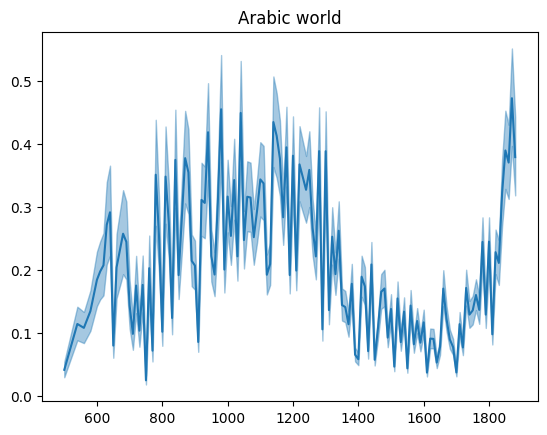

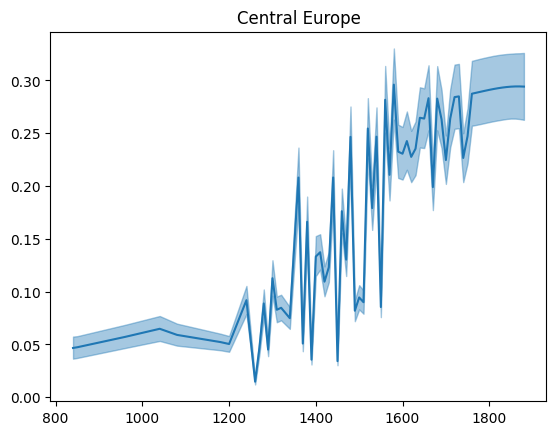

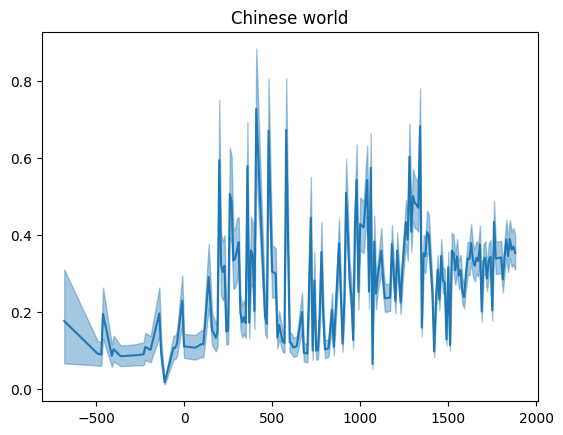

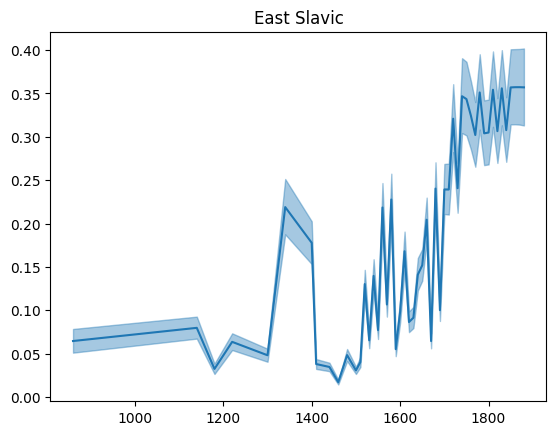

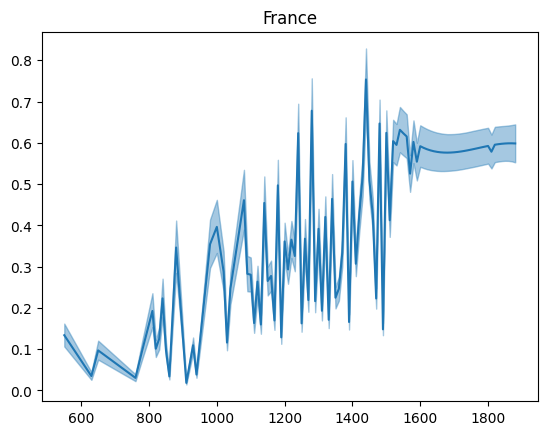

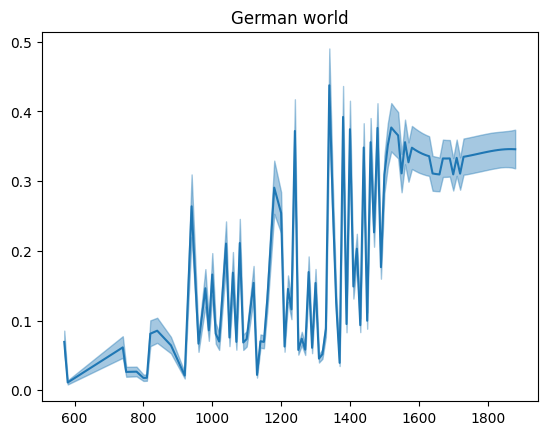

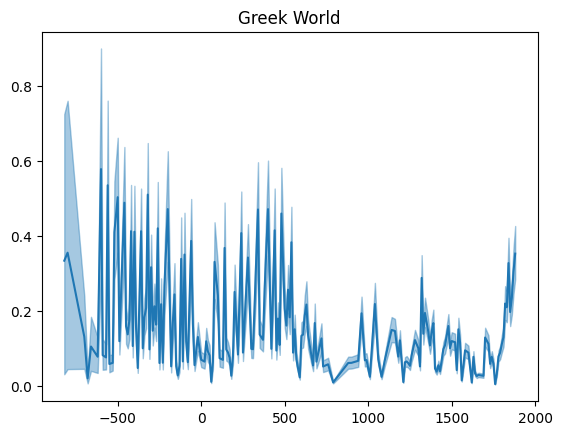

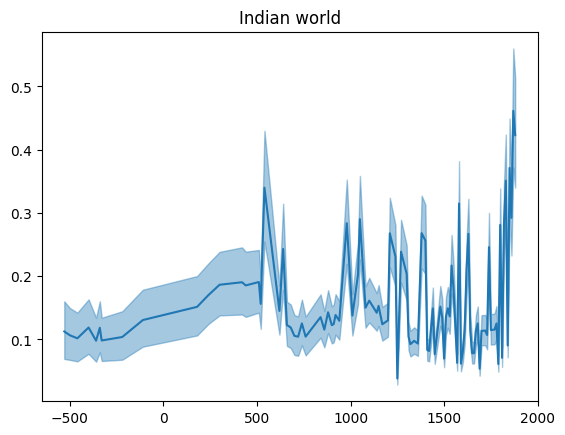

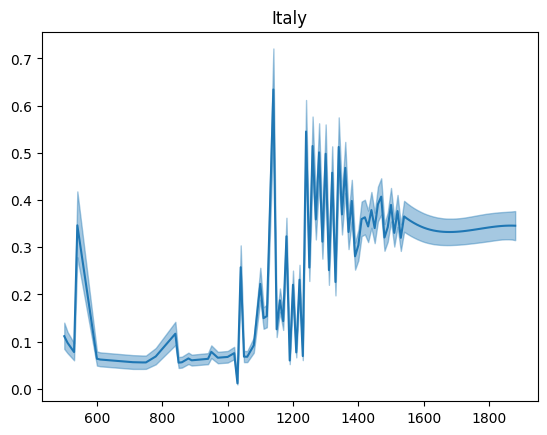

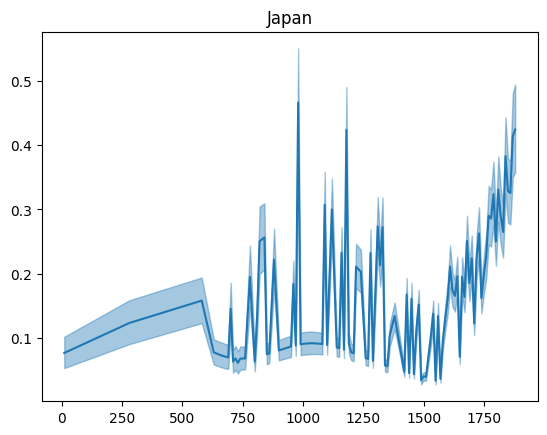

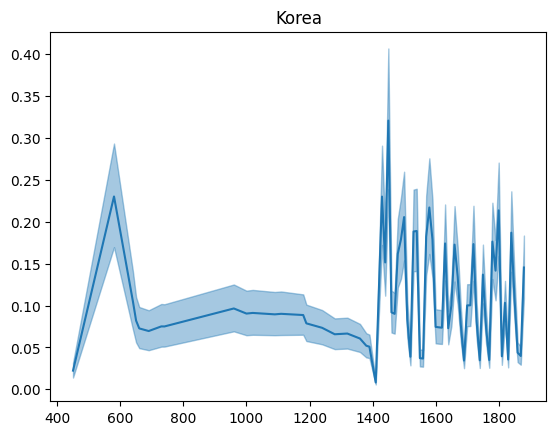

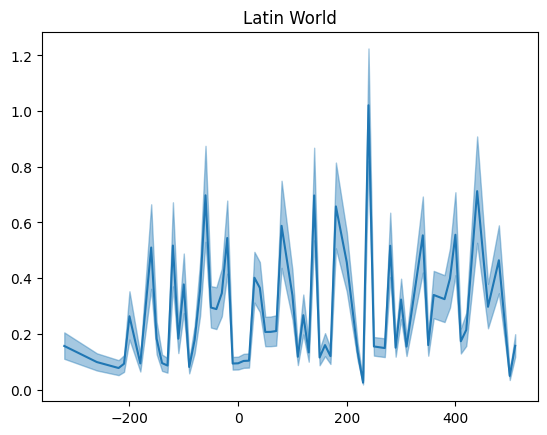

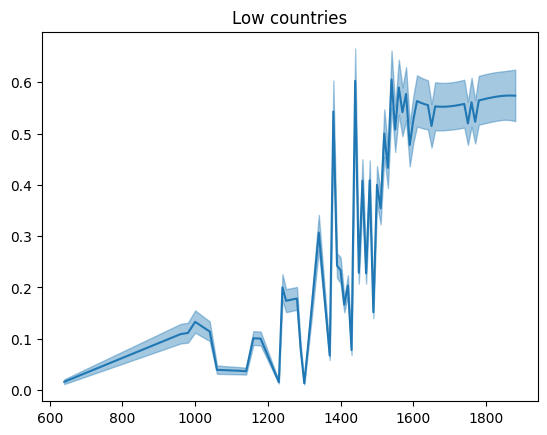

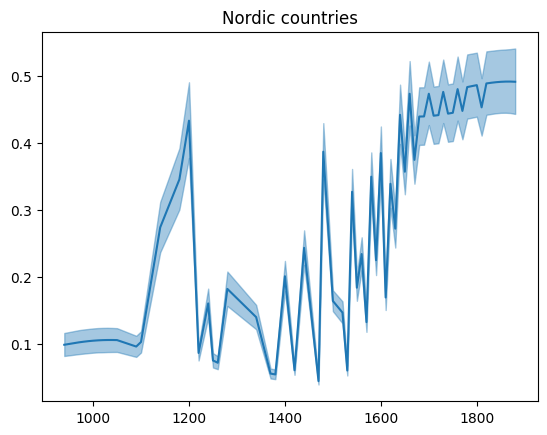

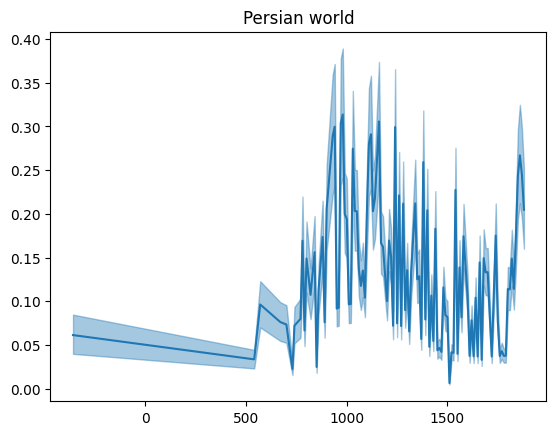

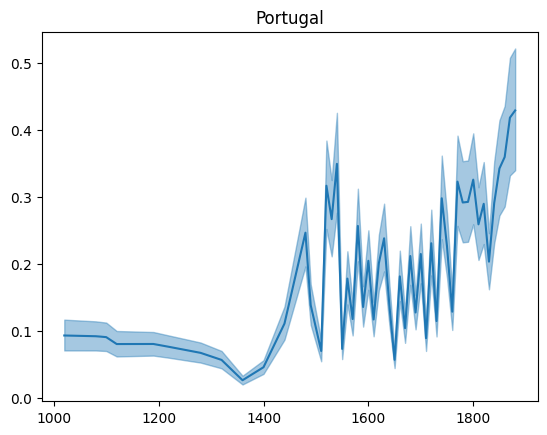

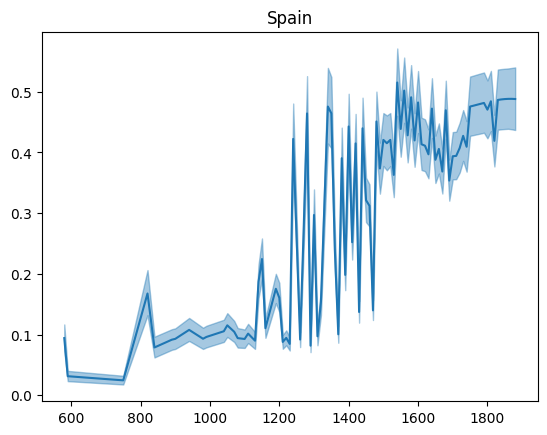

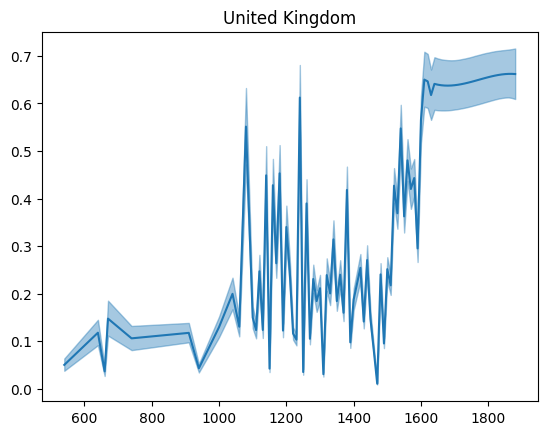

In [24]:
# Get unique regions
regions = data_f2['region_name'].unique()

for i, region in enumerate(regions):
    # Filter data for the current region
    data_f2_filtered = data_f2[data_f2['region_name'] == region]

    # Plot predicted line
    plt.plot(data_f2_filtered["decade"], data_f2_filtered['y_mean'], color='C0')

    # Plot credibility bands
    plt.fill_between(data_f2_filtered["decade"], data_f2_filtered['y_min'],  data_f2_filtered['y_max'], alpha=0.4, color='C0')
    plt.title(region)
    plt.show()